In [5]:
import igraph as ig
import random
from itertools import combinations
from collections import defaultdict

def jaccard_index(set1, set2):
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union != 0 else 0.0

def run_louvain_iterations(g, iterations=10):
    same_community_neighbors = defaultdict(list)

    for _ in range(iterations):
        partition = g.community_multilevel()
        membership = partition.membership

        # Creamos un mapa rápido de nodo -> comunidad
        node_to_comm = {v.index: membership[v.index] for v in g.vs}

        for v in g.vs:
            v_id = v["id"]
            community_neighbors = set()

            for neighbor in g.neighbors(v):
                if node_to_comm[neighbor] == node_to_comm[v.index]:
                    community_neighbors.add(g.vs[neighbor]["id"])

            same_community_neighbors[v_id].append(community_neighbors)

    return same_community_neighbors

def compute_jaccard_stability(same_community_neighbors):
    stability_scores = {}

    for node_id, neighbor_sets in same_community_neighbors.items():
        if len(neighbor_sets) < 2:
            stability_scores[node_id] = 1.0
            continue

        jaccard_scores = []
        for s1, s2 in combinations(neighbor_sets, 2):
            jaccard_scores.append(jaccard_index(s1, s2))

        stability_scores[node_id] = sum(jaccard_scores) / len(jaccard_scores)

    return stability_scores

# Ejemplo de uso:
if __name__ == "__main__":
    # Crear un grafo de ejemplo
    g = ig.Graph.Erdos_Renyi(n=20, m=20)
    g.vs["id"] = [str(i) for i in range(g.vcount())]

    # Ejecutar el experimento
    neighbors_by_iteration = run_louvain_iterations(g, iterations=10)
    jaccard_stability = compute_jaccard_stability(neighbors_by_iteration)

    # Mostrar algunos resultados
    for node, stability in sorted(jaccard_stability.items(), key=lambda x: x[1]):
        print(f"Nodo {node}: Jaccard promedio = {stability:.3f}")


Nodo 1: Jaccard promedio = 0.000
Nodo 3: Jaccard promedio = 0.000
Nodo 6: Jaccard promedio = 0.000
Nodo 17: Jaccard promedio = 0.867
Nodo 5: Jaccard promedio = 0.900
Nodo 14: Jaccard promedio = 0.900
Nodo 0: Jaccard promedio = 1.000
Nodo 2: Jaccard promedio = 1.000
Nodo 4: Jaccard promedio = 1.000
Nodo 7: Jaccard promedio = 1.000
Nodo 8: Jaccard promedio = 1.000
Nodo 9: Jaccard promedio = 1.000
Nodo 10: Jaccard promedio = 1.000
Nodo 11: Jaccard promedio = 1.000
Nodo 12: Jaccard promedio = 1.000
Nodo 13: Jaccard promedio = 1.000
Nodo 15: Jaccard promedio = 1.000
Nodo 16: Jaccard promedio = 1.000
Nodo 18: Jaccard promedio = 1.000
Nodo 19: Jaccard promedio = 1.000


In [6]:
import igraph as ig
import matplotlib.pyplot as plt

def plot_graph_with_jaccard_scores(g, jaccard_stability):
    # Crear etiquetas con el índice de Jaccard redondeado
    g.vs["label"] = [f"{jaccard_stability[v['id']]:.2f}" for v in g.vs]
    
    # Escalar tamaño del nodo en base al índice (opcional, visual)
    g.vs["size"] = [10 + 20 * jaccard_stability[v["id"]] for v in g.vs]

    # Layout del grafo
    layout = g.layout("fr")  # Fruchterman-Reingold

    # Dibujar usando igraph con matplotlib backend
    fig, ax = plt.subplots(figsize=(10, 8))
    ig.plot(
        g,
        target=ax,
        layout=layout,
        vertex_label=g.vs["label"],
        vertex_size=g.vs["size"],
        vertex_color="skyblue",
        edge_color="gray",
        bbox=(600, 600),
        margin=40
    )
    plt.title("Índice de Jaccard promedio por nodo")
    plt.axis("off")
    plt.show()


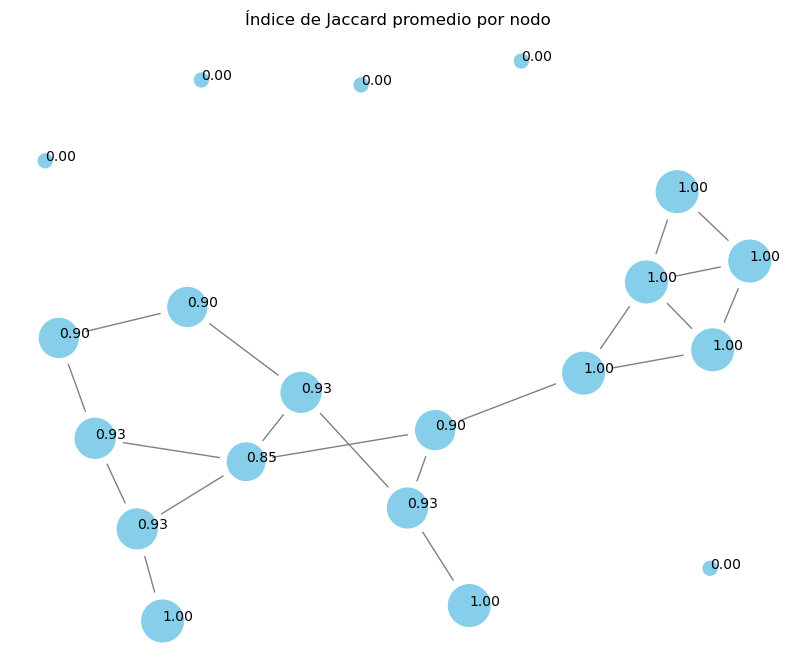

In [9]:
plot_graph_with_jaccard_scores(g, jaccard_stability)
